In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/recommender_system/


/content/drive/MyDrive/recommender_system


In [ ]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sys.path.append('/content/drive/MyDrive/recommender_system/src')


In [ ]:
f = "data/ml-32m/ratings.csv"

In [ ]:
split_ratio = 0.9
from src.data_struct.split_train_test import split_train_test

(userid_to_idx, idx_to_userid, data_train_by_user, data_test_by_user,
movieid_to_idx, idx_to_movieid, data_train_by_movie, data_test_by_movie) = split_train_test(f, split_ratio)

In [ ]:
from src.training.train_parallelize import *
k = 20
lamda = 0.01
gamma = 0.01
tau = 0.1
N = 20
(user_biases, movie_biases, u, v,costs_train,
      rmse_train,  costs_test, rmse_test) = train(data_train_by_user, data_train_by_movie, data_test_by_user,
                                                   k,lamda, gamma,tau, N)

 k=20
lamda=0.01, gamma=0.01, tau=0.1

Iteration   1/20	Train Loss: 112525.1216	Train RMSE: 0.8122	Test Loss: 30137.4842	Test RMSE: 0.8877	Time:  97.55s
Iteration   5/20	Train Loss: 85173.9342	Train RMSE: 0.6821	Test Loss: 27990.6597	Test RMSE: 0.7829	Time: 100.71s
Iteration  10/20	Train Loss: 82067.8196	Train RMSE: 0.6714	Test Loss: 26734.2211	Test RMSE: 0.7738	Time: 220.02s
Iteration  15/20	Train Loss: 80804.3481	Train RMSE: 0.6690	Test Loss: 25893.1588	Test RMSE: 0.7719	Time: 144.83s
Iteration  20/20	Train Loss: 79989.5003	Train RMSE: 0.6681	Test Loss: 25232.0420	Test RMSE: 0.7714	Time: 123.75s
Total duration: 686.86s


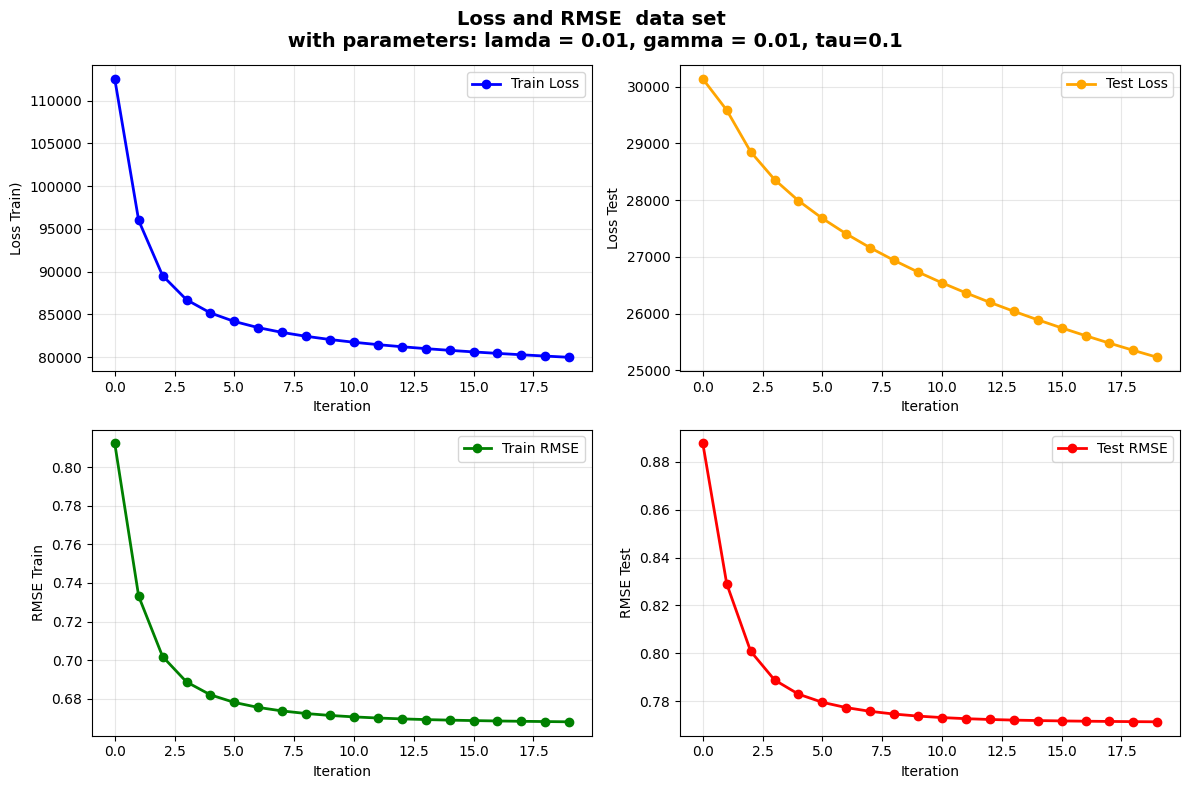

In [ ]:

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(costs_train, label="Train Loss", color='blue', linewidth=2, marker='o')
ax[0, 0].set_ylabel("Loss Train)")
ax[0, 0].set_xlabel("Iteration")
ax[0, 0].legend()
ax[0, 0].grid(True, alpha=0.3)

ax[0, 1].plot(costs_test, label="Test Loss", color='orange', linewidth=2, marker='o')
ax[0, 1].set_ylabel("Loss Test")
ax[0, 1].set_xlabel("Iteration")
ax[0, 1].legend()
ax[0, 1].grid(True, alpha=0.3)

ax[1, 0].plot(rmse_train, label="Train RMSE", color='green', linewidth=2, marker='o')
ax[1, 0].set_ylabel("RMSE Train")
ax[1, 0].set_xlabel("Iteration")
ax[1, 0].legend()
ax[1, 0].grid(True, alpha=0.3)

ax[1, 1].plot(rmse_test, label="Test RMSE", color='red', linewidth=2, marker='o')
ax[1, 1].set_ylabel("RMSE Test")
ax[1, 1].set_xlabel("Iteration")
ax[1, 1].legend()
ax[1, 1].grid(True, alpha=0.3)

fig.suptitle(f"Loss and RMSE  data set \n with parameters: lamda = {lamda}, gamma = {gamma}, tau={tau} ", fontsize=14, fontweight='bold')
plt.tight_layout()

#path = "../figure_saved"
#name_file = f"rating_distribution_{M_data}.pdf"

#os.makedirs(path, exist_ok=True)

#plt.savefig(os.path.join(path, name_file), format='pdf')

plt.show()


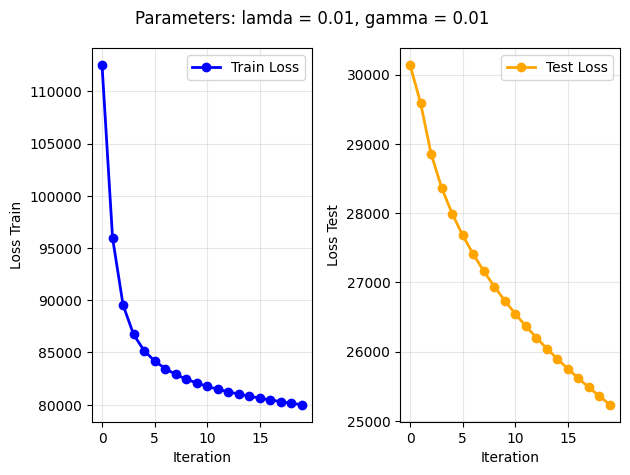

In [ ]:

fig, ax = plt.subplots(1, 2)

ax[0].plot(costs_train, label="Train Loss", color='blue', linewidth=2, marker='o')
ax[0].set_ylabel("Loss Train")
ax[0].set_xlabel("Iteration")
ax[0].legend()
ax[0].grid(True, alpha=0.3)

ax[1].plot(costs_test, label="Test Loss", color='orange', linewidth=2, marker='o')
ax[1].set_ylabel("Loss Test")
ax[1].set_xlabel("Iteration")
ax[1].legend()
ax[1].grid(True, alpha=0.3)



fig.suptitle(f"Parameters: lamda = {lamda}, gamma = {gamma}, tau = {tau} ")
plt.tight_layout()
Namedata = "32M"
# path = "figure_saved"
# name_file = f"Loss_bias_embedding_{Namedata}.pdf"

# os.makedirs(path, exist_ok=True)

# plt.savefig(os.path.join(path, name_file), format='pdf')

plt.show()

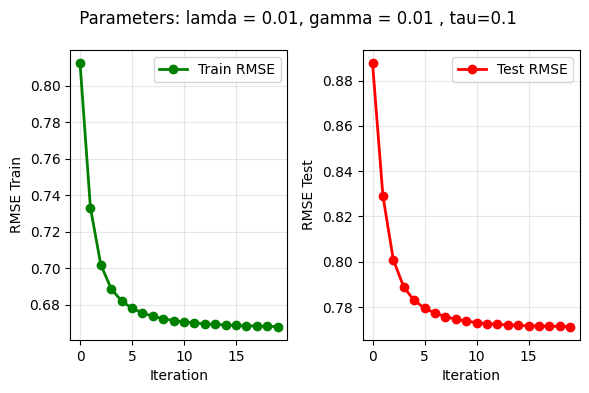

In [ ]:

Namedata = "32M"
fig, ax = plt.subplots(1, 2, figsize=(6,6*0.66))

ax[0].plot(rmse_train, label="Train RMSE", color='green', linewidth=2, marker='o')
ax[0].set_ylabel("RMSE Train")
ax[0].set_xlabel("Iteration")
ax[0].legend()
ax[0].grid(True, alpha=0.3)

ax[1].plot(rmse_test, label="Test RMSE", color='red', linewidth=2, marker='o')
ax[1].set_ylabel("RMSE Test")
ax[1].set_xlabel("Iteration")
ax[1].legend()
ax[1].grid(True, alpha=0.3)

fig.suptitle(f" Parameters: lamda = {lamda}, gamma = {gamma} , tau={tau}")
plt.tight_layout()

# path = "figure_saved"
# name_file = f"RMSE_bias_embedding_{Namedata}.pdf"

# os.makedirs(path, exist_ok=True)

# plt.savefig(os.path.join(path, name_file), format='pdf')

plt.show()

In [ ]:
import pandas as pd

In [ ]:
movies_file="data/ml-32m/movies.csv"
movies_df = pd.read_csv(movies_file)

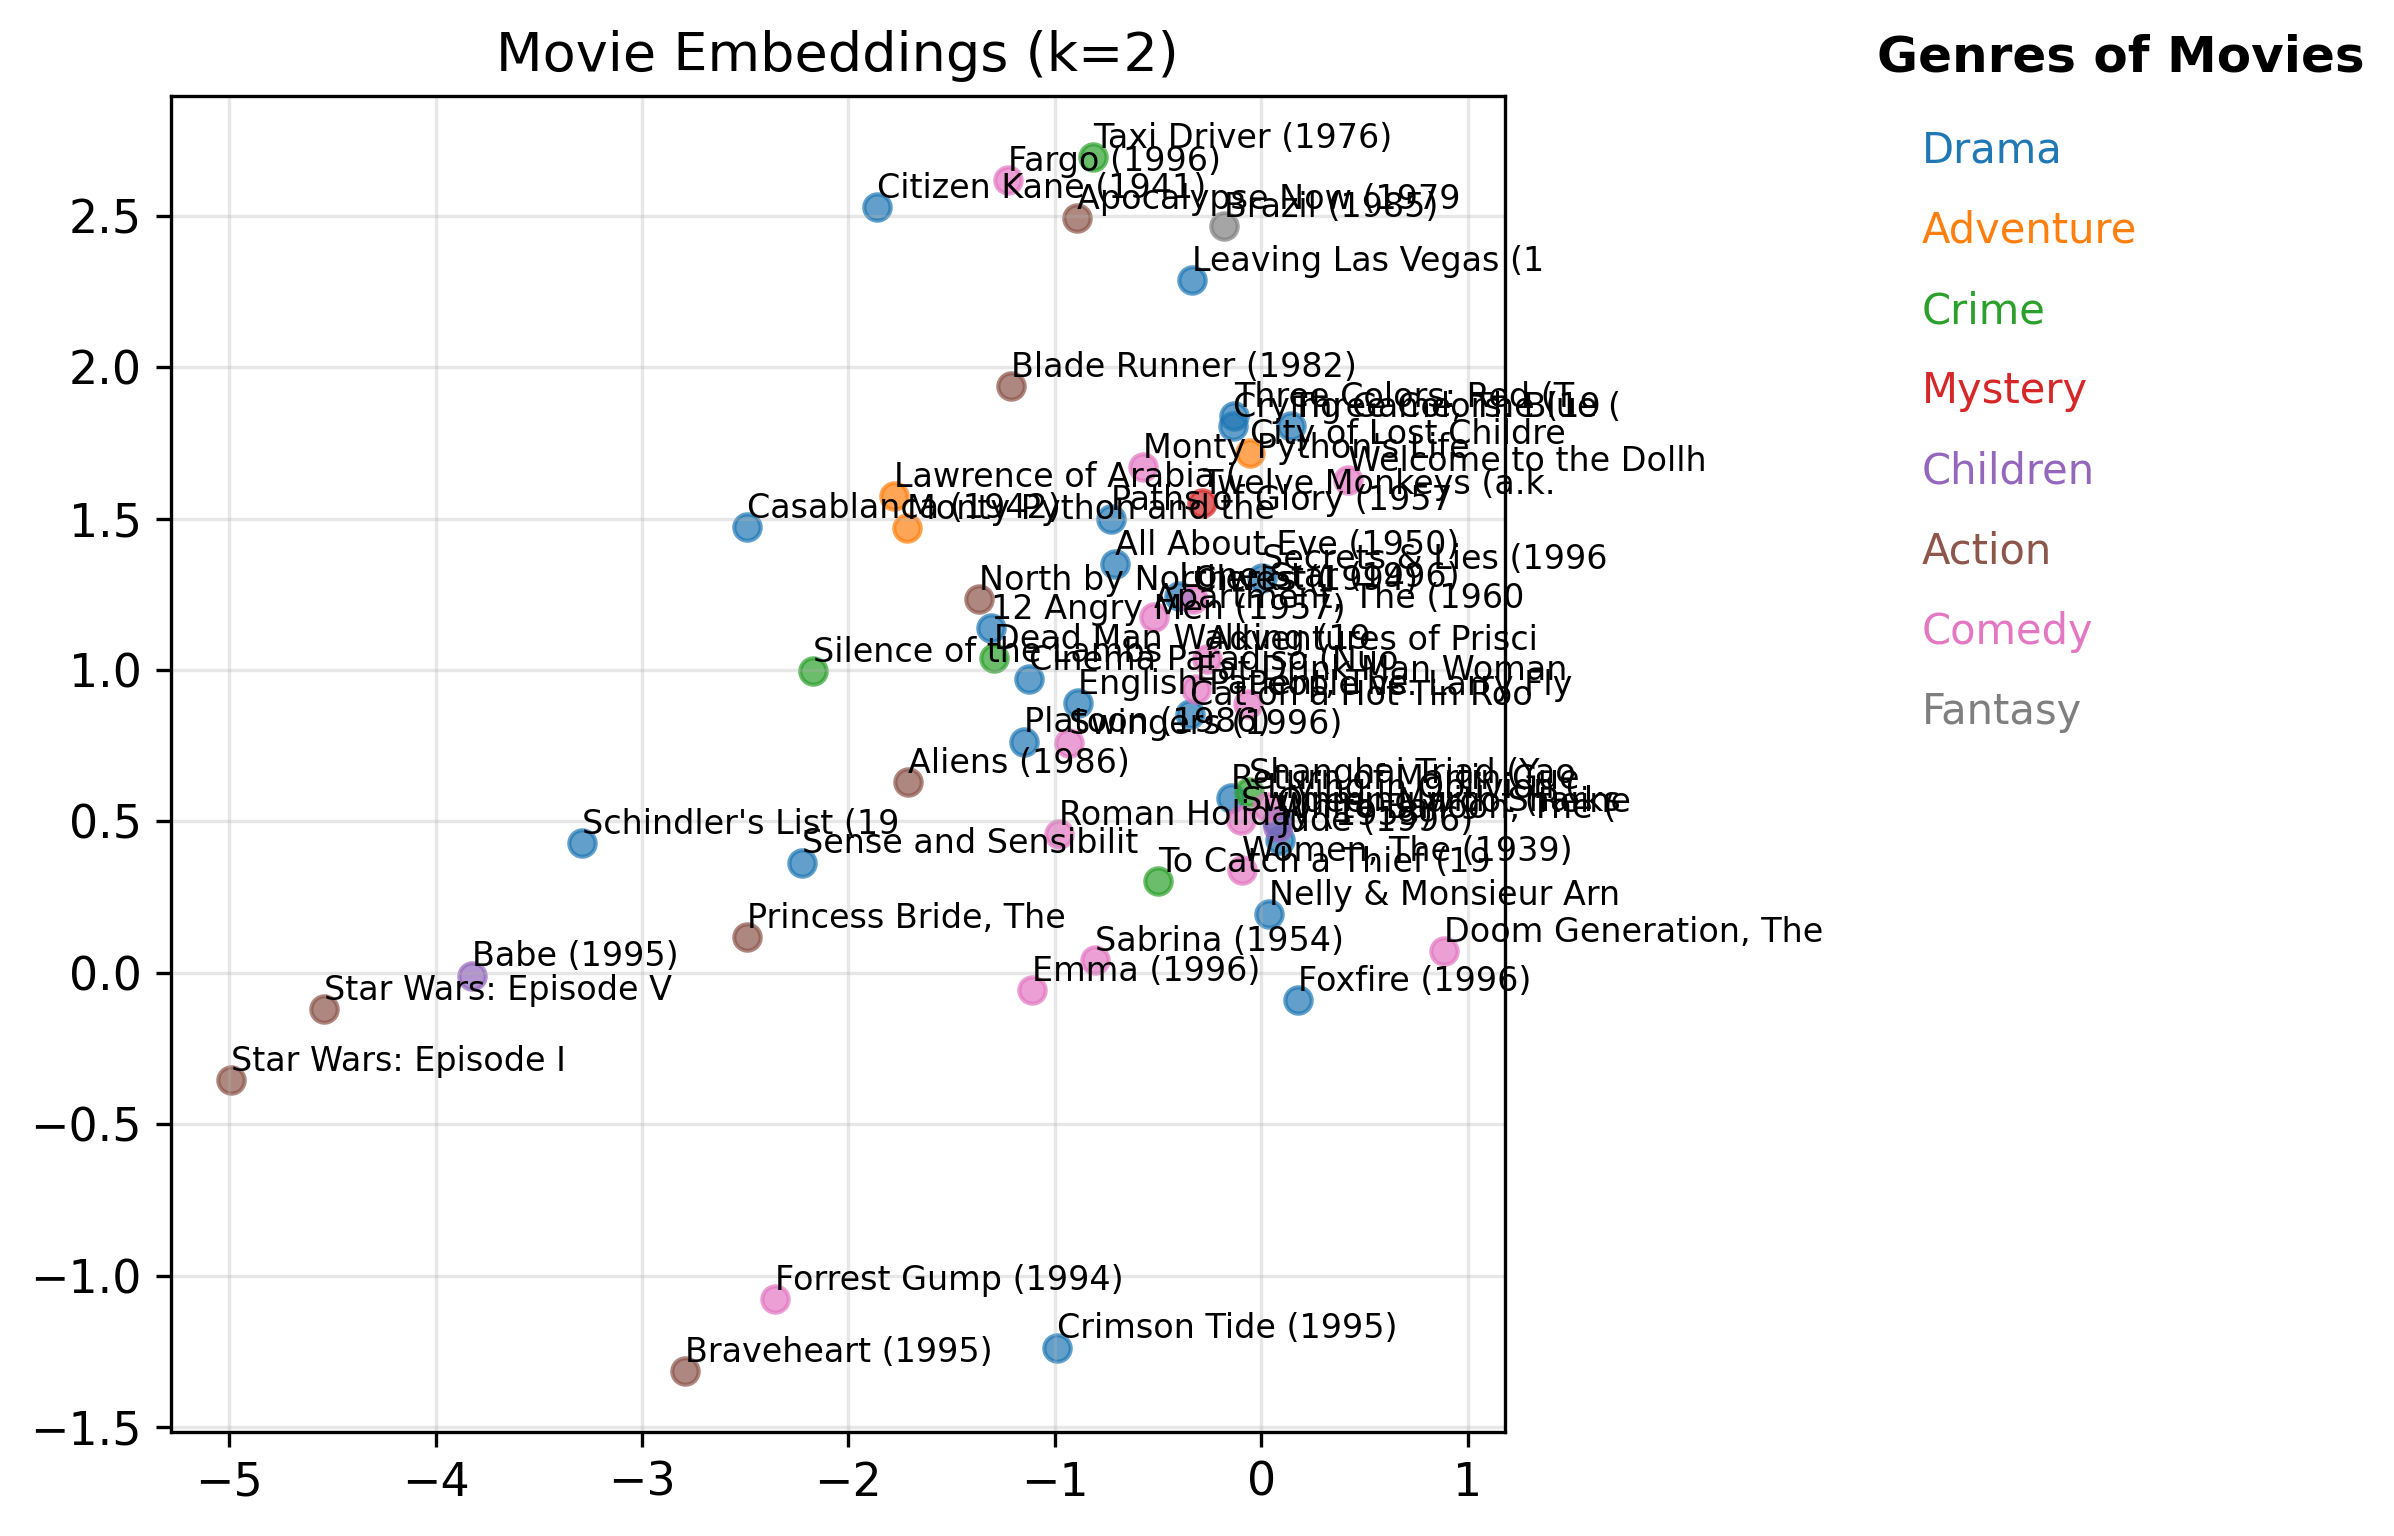

In [ ]:
#Train k = 2
import matplotlib.pyplot as plt
import pandas as pd

movie_info = pd.DataFrame({
    "movieId": [int(movieid) for movieid in idx_to_movieid],
    "x": v[:, 0],
    "y": v[:, 1]
}).merge(movies_df, on="movieId", how="left")

first = 60
movie_selected = movie_info.head(first).copy()
movie_selected["main_genre"] = movie_selected["genres"].fillna("Unknown").apply(lambda g: g.split('|')[0])


unique_genres = movie_selected["main_genre"].unique()
colors = plt.cm.tab10(range(len(unique_genres)))
color_map = dict(zip(unique_genres, colors))
movie_selected["color"] = movie_selected["main_genre"].map(color_map)


fig, (ax1, ax2) = plt.subplots(1, 2,  gridspec_kw={'width_ratios': [3, 1]})

for g in unique_genres:
    sub = movie_selected[movie_selected["main_genre"] == g]
    ax1.scatter(sub["x"], sub["y"], color=color_map[g], s=40, alpha=0.7, label=g)
    for _, row in sub.iterrows():
        ax1.text(row["x"] + 0.00, row["y"] + 0.03, row["title"][:20], fontsize=8)

ax1.set_title(f"Movie Embeddings (k={k})")
ax1.grid(True, alpha=0.3)

ax2.axis('off')
ax2.set_title("Genres of Movies", loc="left", fontsize=12, fontweight='bold')

for i, g in enumerate(unique_genres):
    ax2.text(0.1, 0.95 - i*0.06, f"{g}", fontsize=10, color=color_map[g])
path = "figure_saved"
# name_file = f"clear_version_randomness_movie_embedding_vector_with(k={k}).pdf"

# os.makedirs(path, exist_ok=True)

# plt.savefig(os.path.join(path, name_file), format='pdf')
# #plt.savefig('movie_embeddings_umap.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


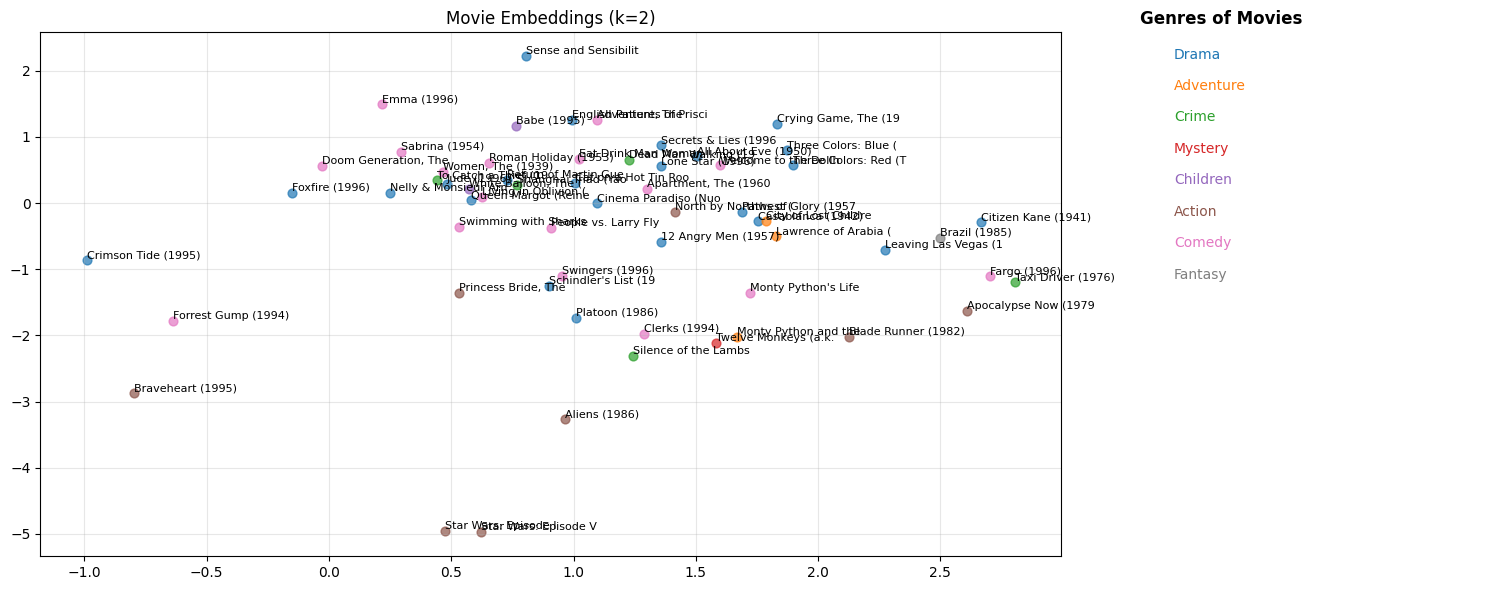

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
v_2d = pca.fit_transform(v)

movie_info_pca = pd.DataFrame({
    "movieId": [int(movieid) for movieid in idx_to_movieid],
    "x": v_2d[:, 0],
    "y": v_2d[:, 1]
}).merge(movies_df, on="movieId", how="left")

first = 60
movie_selected = movie_info_pca.head(first).copy()
movie_selected["main_genre"] = movie_selected["genres"].fillna("Unknown").apply(lambda g: g.split('|')[0])


unique_genres = movie_selected["main_genre"].unique()
colors = plt.cm.tab10(range(len(unique_genres)))
color_map = dict(zip(unique_genres, colors))
movie_selected["color"] = movie_selected["main_genre"].map(color_map)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})

for g in unique_genres:
    sub = movie_selected[movie_selected["main_genre"] == g]
    ax1.scatter(sub["x"], sub["y"], color=color_map[g], s=40, alpha=0.7, label=g)
    for _, row in sub.iterrows():
        ax1.text(row["x"] + 0.00, row["y"] + 0.03, row["title"][:20], fontsize=8)

ax1.set_title(f"Movie Embeddings (k={k})")
ax1.grid(True, alpha=0.3)

ax2.axis('off')
ax2.set_title("Genres of Movies", loc="left", fontsize=12, fontweight='bold')

for i, g in enumerate(unique_genres):
    ax2.text(0.1, 0.95 - i*0.06, f"{g}", fontsize=10, color=color_map[g])
path = "figure_saved"
name_file = f"random_Movie_embedding_vector_with(k={k}).pdf"

os.makedirs(path, exist_ok=True)

plt.savefig(os.path.join(path, name_file), format='pdf')
#plt.savefig('movie_embeddings_umap.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [ ]:


def search_movies_by_keyword(keyword, movie_metadata, movieid_to_idx, v):

    keyword = keyword.lower().strip()

    matches = movie_metadata[movie_metadata['title'].str.contains(keyword, case=False, na=False)]
    matches = matches.copy()
    matches['embedding_index'] = matches['movieId'].map(lambda mid: movieid_to_idx.get(str(mid), None))
    matches = matches.dropna(subset=['embedding_index']).astype({'embedding_index': int})
    matches['vector'] = matches['embedding_index'].apply(lambda i: v[i])

    return matches[['movieId', 'title', 'embedding_index', 'vector']]

results = search_movies_by_keyword("Toy Story", movies_df, movieid_to_idx, v)
display(results.head())


,movieId,title,embedding_index,vector
0,1,Toy Story (1995),415,"[-3.9974949976753074, -0.5652516963600797]"
3021,3114,Toy Story 2 (1999),1287,"[-3.7019375631544076, -0.57530585562723]"
14815,78499,Toy Story 3 (2010),3080,"[-3.4848270757903514, -0.42973566163350374]"
20505,106022,Toy Story of Terror (2013),12260,"[-0.318089895156578, -0.14777569703051133]"
22646,115875,Toy Story Toons: Hawaiian Vacation (2011),8493,"[-0.18598654844928347, 0.024418630092717147]"


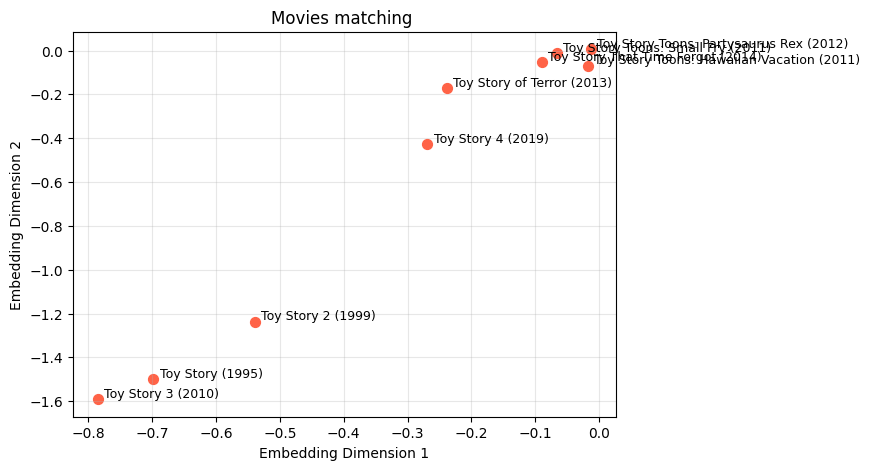

In [ ]:
subset = results.copy()
plt.figure(figsize=(7,5))
plt.scatter(subset['vector'].apply(lambda x: x[0]),
            subset['vector'].apply(lambda x: x[1]),
            color='tomato', s=50)
for _, row in subset.iterrows():
    plt.text(row['vector'][0] + 0.01, row['vector'][1] + 0.01, row['title'], fontsize=9)
plt.title(f"Movies matching ")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
def multi_search_movie_embeddings(keywords, movie_metadata, movieid_to_idx, v):
    all_results = []

    for word in keywords:
        word = word.lower().strip()
        matches = movie_metadata[movie_metadata['title'].str.lower().str.contains(word, na=False)]
        matches = matches.copy()
        matches['search_keyword'] = word
        matches['embedding_index'] = matches['movieId'].map(lambda mid: movieid_to_idx.get(str(mid), None))
        matches = matches.dropna(subset=['embedding_index']).astype({'embedding_index': int})
        matches['vector'] = matches['embedding_index'].apply(lambda i: v[i])

        all_results.append(matches[['movieId', 'title', 'embedding_index', 'vector', 'search_keyword']])


    combined = pd.concat(all_results, ignore_index=True)
    return combined
keywords = ["toy story", "lord of the rings", "home alone"]
results = multi_search_movie_embeddings(keywords, movies_df, movieid_to_idx, v)
display(results)


,movieId,title,embedding_index,vector,search_keyword
0,1,Toy Story (1995),415,"[-3.9974949976753074, -0.5652516963600797]",toy story
1,3114,Toy Story 2 (1999),1287,"[-3.7019375631544076, -0.57530585562723]",toy story
2,78499,Toy Story 3 (2010),3080,"[-3.4848270757903514, -0.42973566163350374]",toy story
3,106022,Toy Story of Terror (2013),12260,"[-0.318089895156578, -0.14777569703051133]",toy story
4,115875,Toy Story Toons: Hawaiian Vacation (2011),8493,"[-0.18598654844928347, 0.024418630092717147]",toy story
5,115879,Toy Story Toons: Small Fry (2011),17545,"[-0.10948790914456279, -0.04253047503699434]",toy story
6,120468,Toy Story Toons: Partysaurus Rex (2012),33361,"[-0.06957399571717315, -0.015101342613824516]",toy story
7,120474,Toy Story That Time Forgot (2014),11771,"[-0.2590388557339288, -0.051080801723972766]",toy story
8,201588,Toy Story 4 (2019),6787,"[-0.8466846928874088, -0.14437472807955853]",toy story
9,2116,"Lord of the Rings, The (1978)",1819,"[-0.38427824315499415, -0.36356958962841246]",lord of the rings


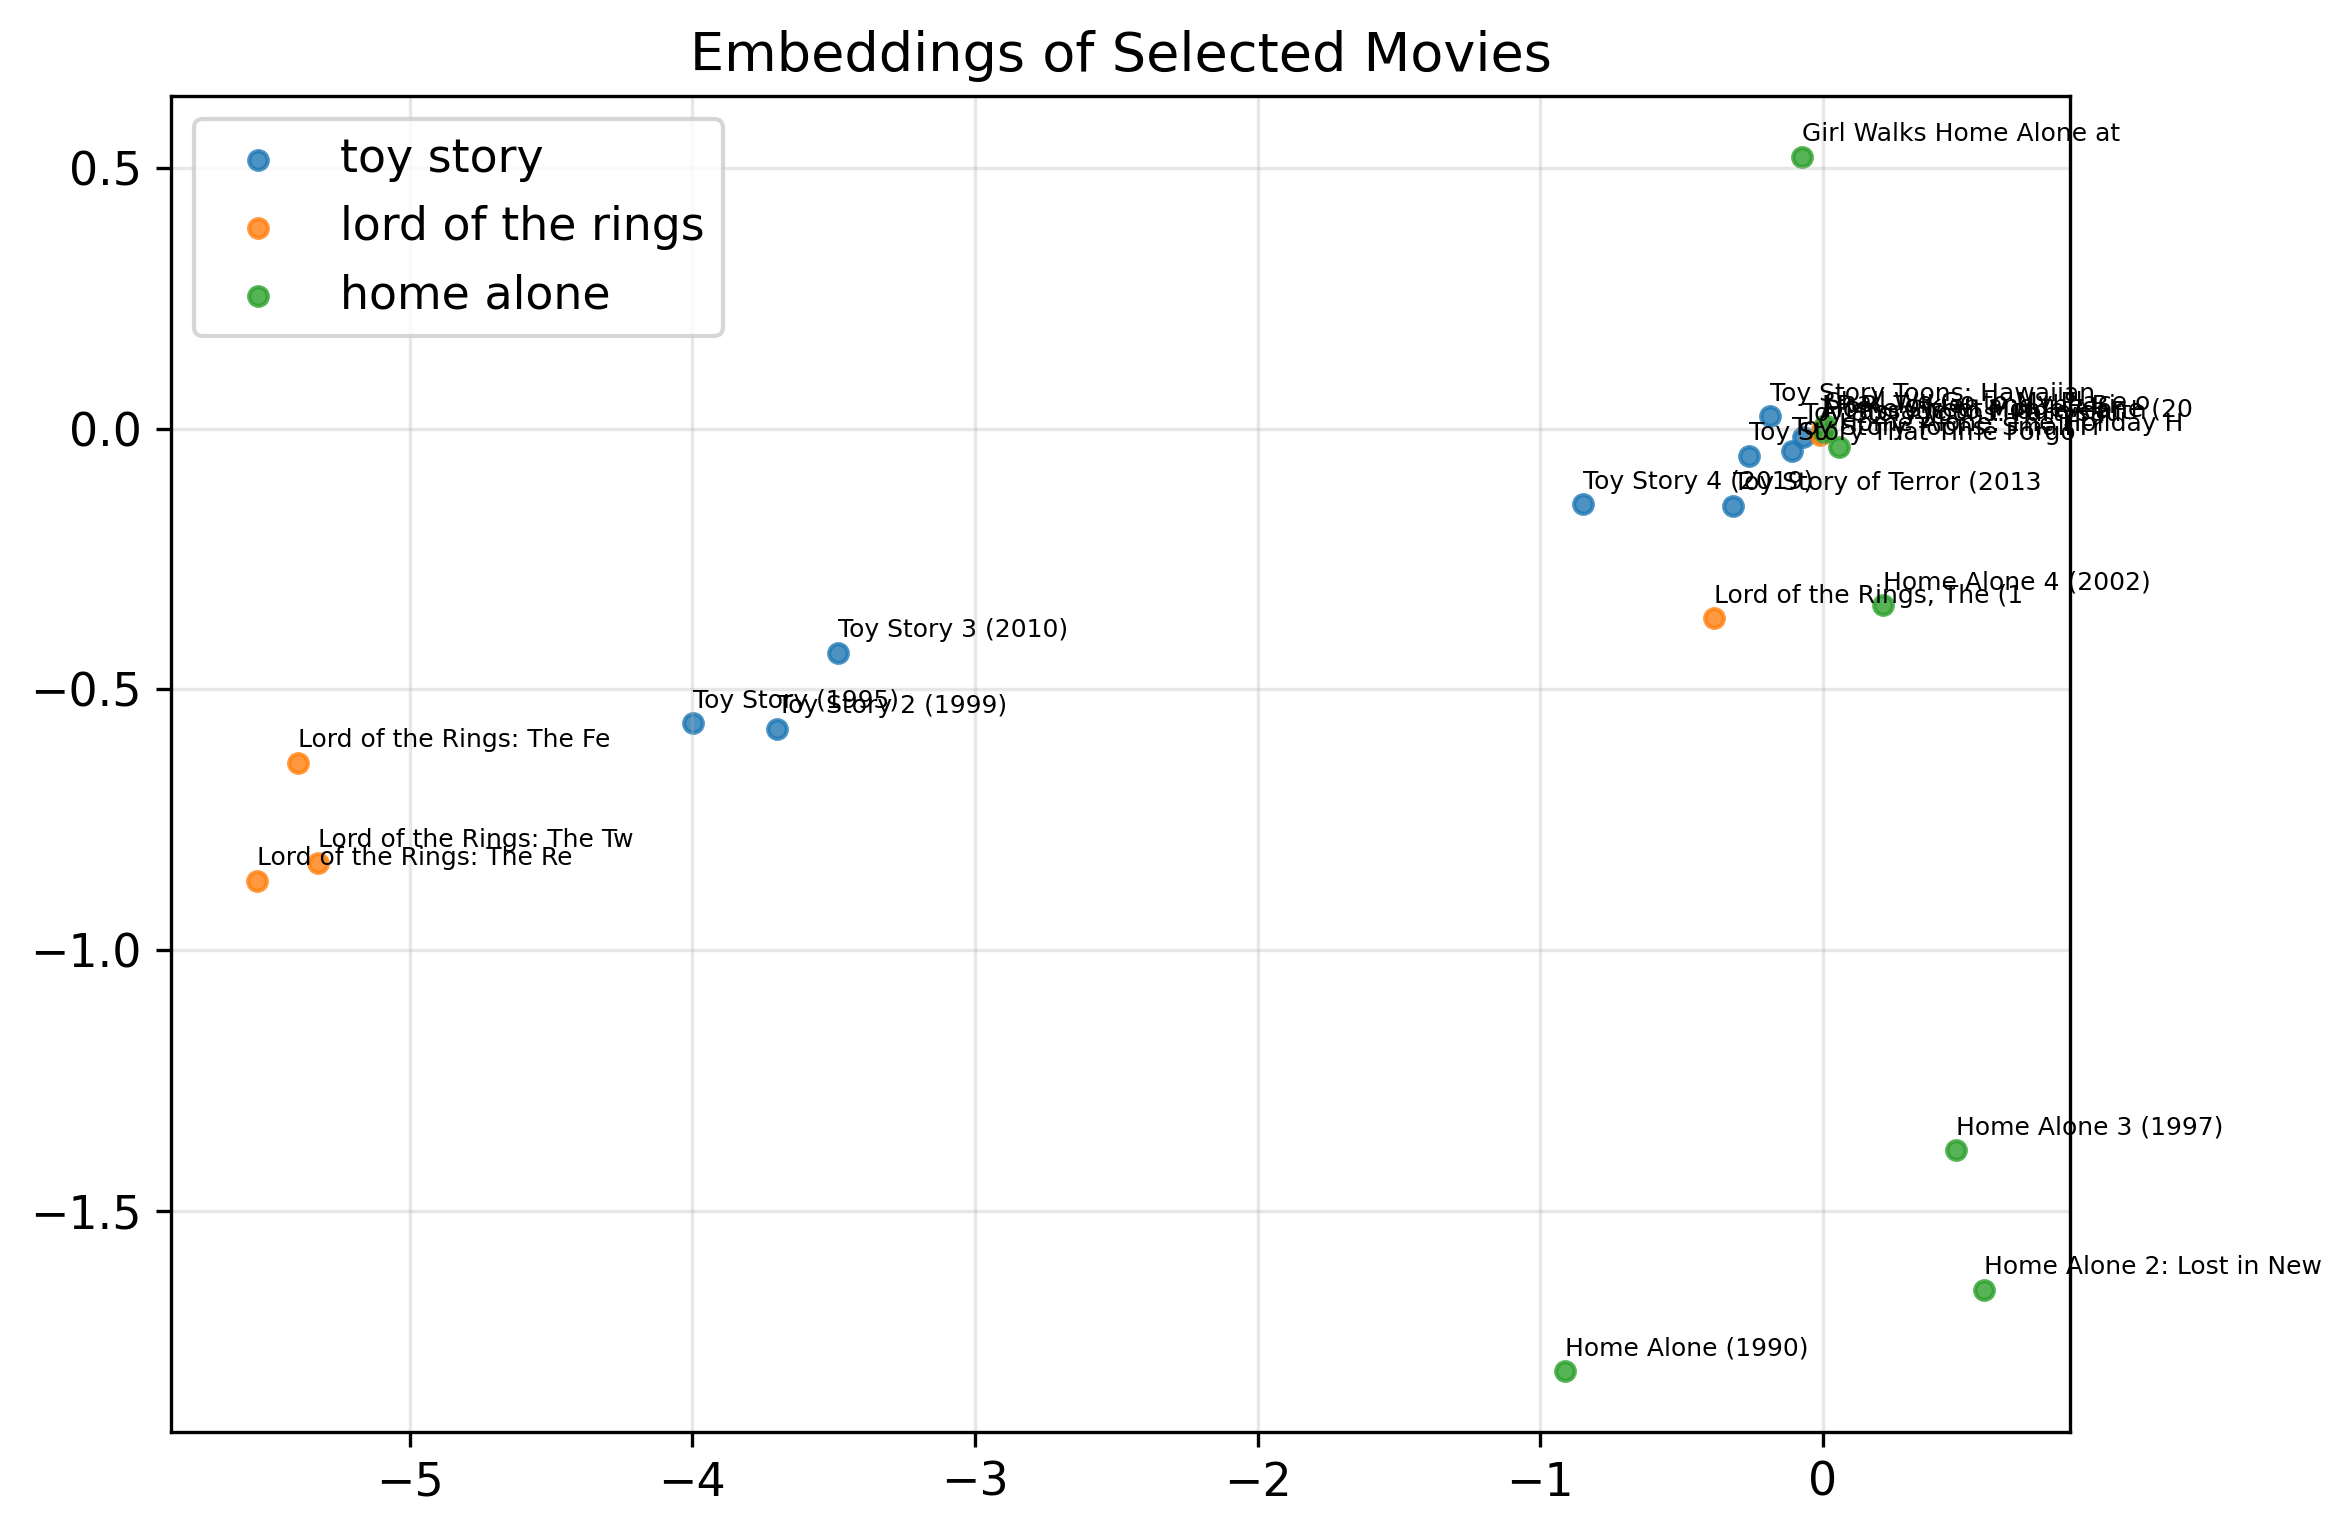

In [ ]:
plt.figure()
colors = plt.cm.tab10(range(len(keywords)))
color_map = dict(zip(keywords, colors))

for word in keywords:
    subset = results[results['search_keyword'] == word]
    plt.scatter(subset['vector'].apply(lambda x: x[0]),
                subset['vector'].apply(lambda x: x[1]),
                s=20, alpha=0.8, label=word, color=color_map[word])
    for _, row in subset.iterrows():
        plt.text(row['vector'][0] + 0.00, row['vector'][1] + 0.03, row['title'][:25], fontsize=6)

plt.title("Embeddings of Selected Movies")
plt.legend()
plt.grid(True, alpha=0.3)
# path = "figure_saved"
# name_file = f"clear_selected_Movie_embedding_vector_with(k={k}).pdf"

# os.makedirs(path, exist_ok=True)

# plt.savefig(os.path.join(path, name_file), format='pdf')
# #plt.savefig('movie_embeddings_umap.png', dpi=300, bbox_inches='tight')

plt.tight_layout()

plt.show()


In [ ]:
from src.training.train_parallelize import *
k = 20
lamda = 0.01
gamma = 0.01
tau = 0.5
N = 20
(user_biases, movie_biases, u, v,costs_train,
      rmse_train,  costs_test, rmse_test) = train(data_train_by_user, data_train_by_movie, data_test_by_user,
                                                   k,lamda, gamma,tau, N)



 k=20
lamda=0.01, gamma=0.01, tau=0.5

Iteration   1/20	Train Loss: 129302.0121	Train RMSE: 0.8371	Test Loss:     0.0000	Test RMSE: 0.0000	Time:  89.66s
Iteration   5/20	Train Loss: 106604.8316	Train RMSE: 0.7181	Test Loss:     0.0000	Test RMSE: 0.0000	Time: 114.66s
Iteration  10/20	Train Loss: 105217.9250	Train RMSE: 0.7130	Test Loss:     0.0000	Test RMSE: 0.0000	Time: 137.77s
Iteration  15/20	Train Loss: 104500.4039	Train RMSE: 0.7122	Test Loss:     0.0000	Test RMSE: 0.0000	Time: 145.46s
Iteration  20/20	Train Loss: 103894.4131	Train RMSE: 0.7119	Test Loss:     0.0000	Test RMSE: 0.0000	Time: 139.67s
Total duration: 627.21s


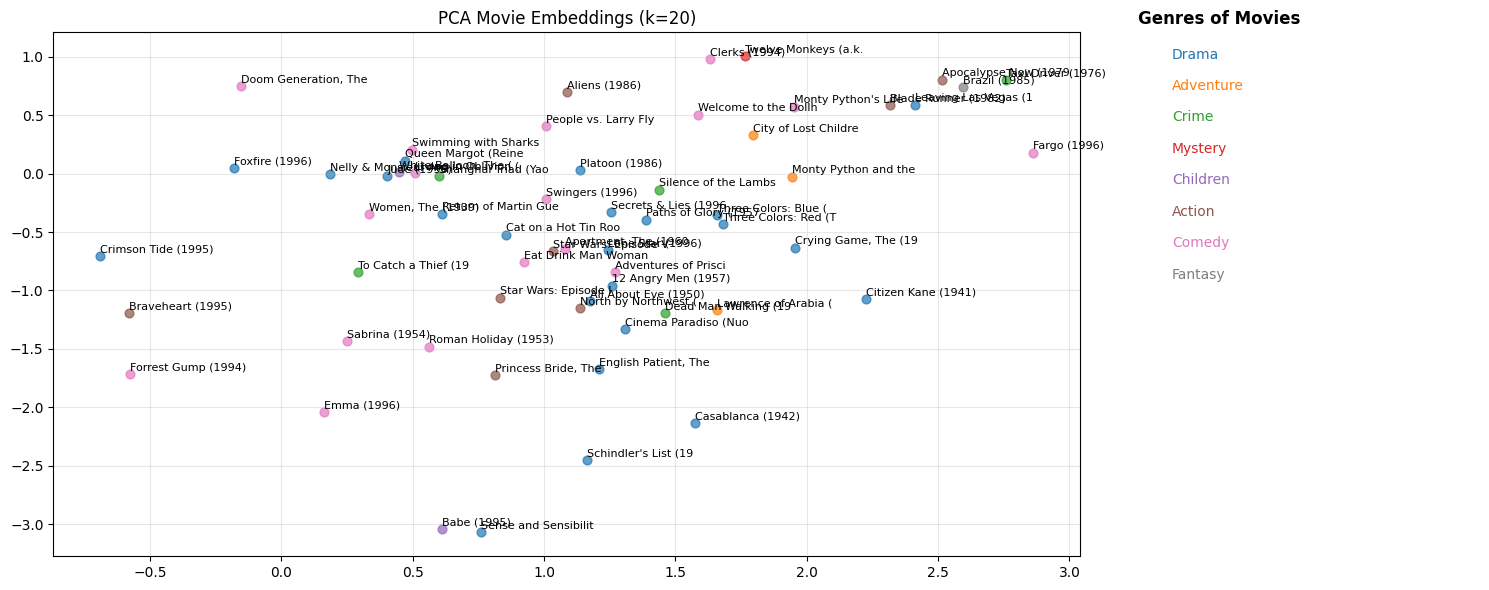

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
v_2d = pca.fit_transform(v)

movie_info_pca = pd.DataFrame({
    "movieId": [int(movieid) for movieid in idx_to_movieid],
    "x": v_2d[:, 0],
    "y": v_2d[:, 1]
}).merge(movies_df, on="movieId", how="left")

first = 60
movie_selected = movie_info_pca.head(first).copy()
movie_selected["main_genre"] = movie_selected["genres"].fillna("Unknown").apply(lambda g: g.split('|')[0])


unique_genres = movie_selected["main_genre"].unique()
colors = plt.cm.tab10(range(len(unique_genres)))
color_map = dict(zip(unique_genres, colors))
movie_selected["color"] = movie_selected["main_genre"].map(color_map)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})

for g in unique_genres:
    sub = movie_selected[movie_selected["main_genre"] == g]
    ax1.scatter(sub["x"], sub["y"], color=color_map[g], s=40, alpha=0.7, label=g)
    for _, row in sub.iterrows():
        ax1.text(row["x"] + 0.00, row["y"] + 0.03, row["title"][:20], fontsize=8)

ax1.set_title(f"PCA Movie Embeddings (k={k})")
ax1.grid(True, alpha=0.3)

ax2.axis('off')
ax2.set_title("Genres of Movies", loc="left", fontsize=12, fontweight='bold')

for i, g in enumerate(unique_genres):
    ax2.text(0.1, 0.95 - i*0.06, f"{g}", fontsize=10, color=color_map[g])
path = "figure_saved"
name_file = f"random_Movie_embedding_vector_with(k={k}).pdf"

os.makedirs(path, exist_ok=True)

plt.savefig(os.path.join(path, name_file), format='pdf')
#plt.savefig('movie_embeddings_umap.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [ ]:
keywords = ["toy story", "lord of the rings", "home alone"]
results = multi_search_movie_embeddings(keywords, movies_df, movieid_to_idx, v_2d)
display(results)


,movieId,title,embedding_index,vector,search_keyword
0,1,Toy Story (1995),415,"[0.38475329753992976, -2.599997717406565]",toy story
1,3114,Toy Story 2 (1999),1287,"[0.4000143306053416, -2.5737096223266027]",toy story
2,78499,Toy Story 3 (2010),3080,"[0.6910547507939706, -2.06937886010793]",toy story
3,106022,Toy Story of Terror (2013),12260,"[-0.03613817339565749, -0.18756673632440696]",toy story
4,115875,Toy Story Toons: Hawaiian Vacation (2011),8493,"[0.05427315825308691, -0.15965161909451211]",toy story
5,115879,Toy Story Toons: Small Fry (2011),17545,"[-0.03244282772503849, -0.10583522511563939]",toy story
6,120468,Toy Story Toons: Partysaurus Rex (2012),33361,"[0.004278724149036845, -0.08233204982188203]",toy story
7,120474,Toy Story That Time Forgot (2014),11771,"[-0.005511478175734245, -0.15558495102010894]",toy story
8,201588,Toy Story 4 (2019),6787,"[0.15557439439053133, -0.7580550834692653]",toy story
9,2116,"Lord of the Rings, The (1978)",1819,"[-0.1807725243946575, 0.1420023575003967]",lord of the rings


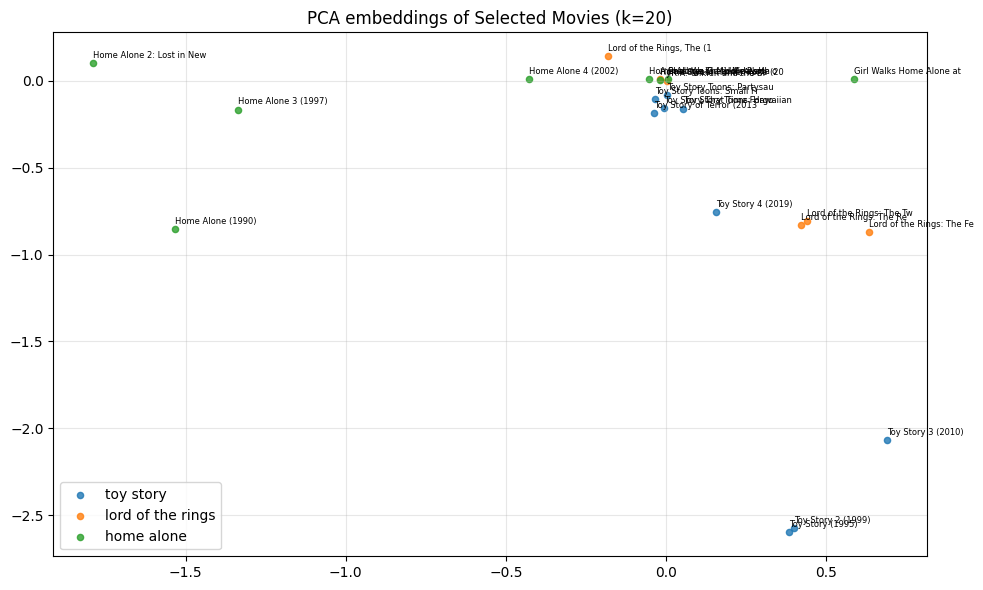

In [ ]:
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(keywords)))
color_map = dict(zip(keywords, colors))

for word in keywords:
    subset = results[results['search_keyword'] == word]
    plt.scatter(subset['vector'].apply(lambda x: x[0]),
                subset['vector'].apply(lambda x: x[1]),
                s=20, alpha=0.8, label=word, color=color_map[word])
    for _, row in subset.iterrows():
        plt.text(row['vector'][0] + 0.00, row['vector'][1] + 0.03, row['title'][:25], fontsize=6)


plt.title(f"PCA embeddings of Selected Movies (k={k})")
plt.legend()
plt.grid(True, alpha=0.3)
# path = "figure_saved"
# name_file = f"selected_Movie_embedding_vector_with(k={k}).pdf"

# os.makedirs(path, exist_ok=True)

# plt.savefig(os.path.join(path, name_file), format='pdf')
# #plt.savefig('movie_embeddings_umap.png', dpi=300, bbox_inches='tight')

plt.tight_layout()

plt.show()


In [ ]:
from src.training.train_parallelize import *

k = 10
lamda = 0.1
gamma = 0.1
tau = 0.1
N = 50
(user_biases, movie_biases, u, v,costs_train,
      rmse_train,  costs_test, rmse_test) = train(data_train_by_user, data_train_by_movie, data_test_by_user,
                                                   k,lamda, gamma,tau, N)



 k=10
lamda=0.1, gamma=0.1, tau=0.1

Iteration   1/50	Train Loss: 1012133.5938	Train RMSE: 0.8208	Test Loss: 408279.1192	Test RMSE: 0.8989	Time: 103.85s
Iteration   5/50	Train Loss: 788947.1025	Train RMSE: 0.7166	Test Loss: 339405.8269	Test RMSE: 0.8057	Time:  43.95s
Iteration  10/50	Train Loss: 753004.5094	Train RMSE: 0.7045	Test Loss: 319437.8647	Test RMSE: 0.7939	Time:  51.17s
Iteration  15/50	Train Loss: 738472.1069	Train RMSE: 0.7021	Test Loss: 308204.5422	Test RMSE: 0.7921	Time:  52.23s
Iteration  20/50	Train Loss: 728284.1751	Train RMSE: 0.7012	Test Loss: 299287.9528	Test RMSE: 0.7914	Time:  51.19s
Iteration  25/50	Train Loss: 720055.7489	Train RMSE: 0.7007	Test Loss: 291702.5043	Test RMSE: 0.7909	Time:  50.17s
Iteration  30/50	Train Loss: 713147.9972	Train RMSE: 0.7004	Test Loss: 285178.8528	Test RMSE: 0.7905	Time:  52.37s
Iteration  35/50	Train Loss: 707284.0869	Train RMSE: 0.7002	Test Loss: 279573.7245	Test RMSE: 0.7902	Time:  49.54s
Iteration  40/50	Train Loss: 702268.3429	T

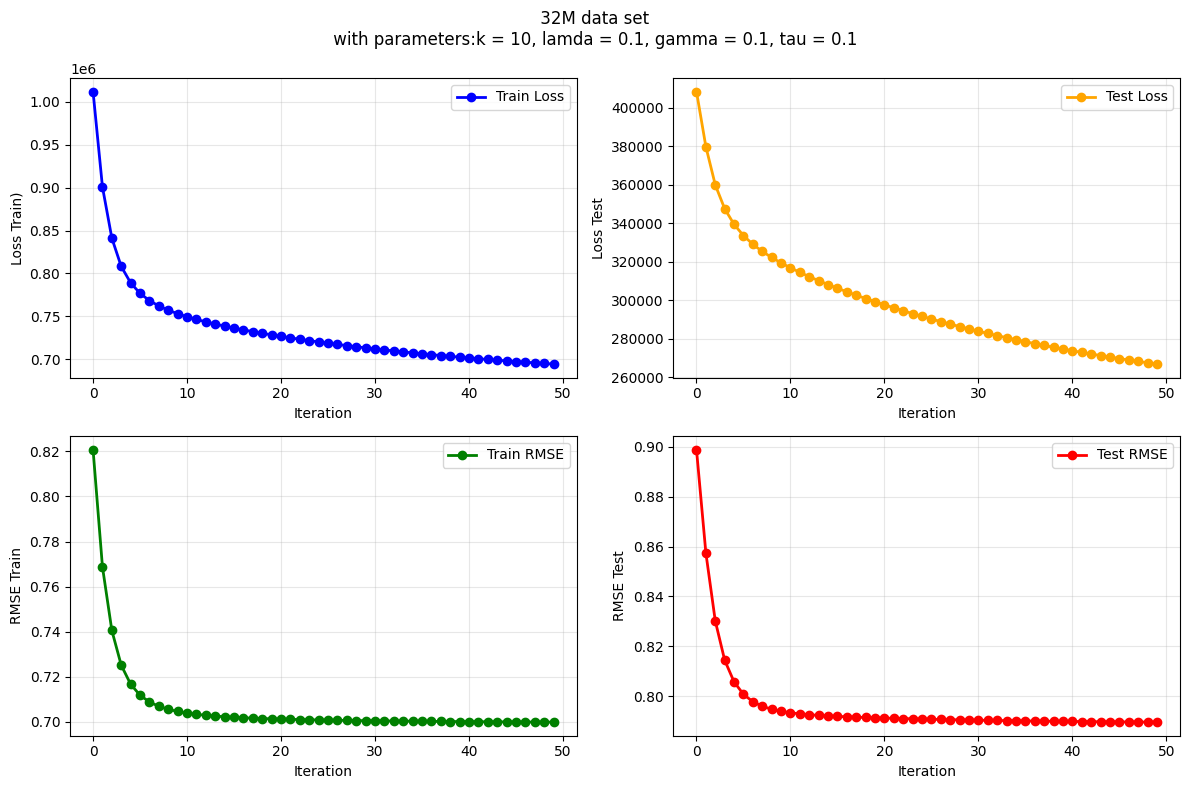

In [ ]:
Namedata = "32M"
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(costs_train, label="Train Loss", color='blue', linewidth=2, marker='o')
ax[0, 0].set_ylabel("Loss Train)")
ax[0, 0].set_xlabel("Iteration")
ax[0, 0].legend()
ax[0, 0].grid(True, alpha=0.3)

ax[0, 1].plot(costs_test, label="Test Loss", color='orange', linewidth=2, marker='o')
ax[0, 1].set_ylabel("Loss Test")
ax[0, 1].set_xlabel("Iteration")
ax[0, 1].legend()
ax[0, 1].grid(True, alpha=0.3)

ax[1, 0].plot(rmse_train, label="Train RMSE", color='green', linewidth=2, marker='o')
ax[1, 0].set_ylabel("RMSE Train")
ax[1, 0].set_xlabel("Iteration")
ax[1, 0].legend()
ax[1, 0].grid(True, alpha=0.3)

ax[1, 1].plot(rmse_test, label="Test RMSE", color='red', linewidth=2, marker='o')
ax[1, 1].set_ylabel("RMSE Test")
ax[1, 1].set_xlabel("Iteration")
ax[1, 1].legend()
ax[1, 1].grid(True, alpha=0.3)

fig.suptitle(f" {Namedata} data set \n with parameters:k = {k}, lamda = {lamda}, gamma = {gamma}, tau = {tau} ")
plt.tight_layout()

#path = "../figure_saved"
#name_file = f"rating_distribution_{M_data}.pdf"

#os.makedirs(path, exist_ok=True)

#plt.savefig(os.path.join(path, name_file), format='pdf')

plt.show()


In [ ]:
import numpy as np
import pandas as pd


def make_recommendations(user_id, user_biases, movie_biases, u, v,
                         idx_to_movieid, movies_df,
                        top_k, bias_weight=0.05):
    scores = np.dot(v, u[user_id]) + bias_weight * movie_biases

    # rank the result to descending order
    top_recommandation = np.argsort(scores)[::-1]

    recommendations = []
    for movie_idx in top_recommandation:
        if len(recommendations) >= top_k:
            break

        movie_id = idx_to_movieid[movie_idx]
        score = scores[movie_idx]

        # movie detail
        title = f"Movie {movie_id}"
        genres = ""

        if movies_df is not None:
            movie_row = movies_df[movies_df['movieId'] == int(movie_id)]
            if not movie_row.empty:
                title = movie_row.iloc[0]['title']
                genres = movie_row.iloc[0].get('genres', '')

        recommendations.append({
            'movie_idx': movie_idx,
            'movie_id': movie_id,
            'title': title,
            'genres': genres,
            'score': score
        })

    return recommendations



def get_user_recommendations(data_user, movie_biases, v,
                                  idx_to_movieid, movies_df,
                                  k, lamda, gamma, tau,
                                  top_k=20, bias_weight=0.05):
    data_by_user = [data_user]
    indptr, indices, values = convert_structure(data_by_user)

    user_bias = np.zeros(1, dtype=np.float64)
    u = np.random.randn(1, k).astype(np.float64) / np.sqrt(k)

    for _ in range(100):
        update_biases_n_vec_embedding(
            indptr, indices, values,
            user_bias, movie_biases, u, v,
            lamda, gamma, tau
        )

    recommendations = make_recommendations(0, user_bias, movie_biases, u, v,
        idx_to_movieid, movies_df,top_k, bias_weight
    )

    return recommendations, user_bias[0], u[0]




In [ ]:
import pandas as pd

In [ ]:
movies_file="data/ml-32m/movies.csv"
movies_df = pd.read_csv(movies_file)

In [ ]:
movies_df[movies_df['title'].str.contains("Toy Story", case=False, na=False)]


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3021,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
14815,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX
20505,106022,Toy Story of Terror (2013),Animation|Children|Comedy
22646,115875,Toy Story Toons: Hawaiian Vacation (2011),Adventure|Animation|Children|Comedy|Fantasy
22647,115879,Toy Story Toons: Small Fry (2011),Adventure|Animation|Children|Comedy|Fantasy
24088,120468,Toy Story Toons: Partysaurus Rex (2012),Animation|Children|Comedy
24090,120474,Toy Story That Time Forgot (2014),Animation|Children
60708,201588,Toy Story 4 (2019),Adventure|Animation|Children|Comedy


In [ ]:
mId = ['2116','4993','5952','7153']
sss = []
for e in mId:
  fff = movieid_to_idx[e]
  sss.append(fff)
print(sss)

[1819, 339, 596, 613]


In [ ]:
from src.prediction.recommendation import *

dummy_data = [(339, 5.0)]

example = get_user_recommendations(dummy_data, movie_biases, v,
                                  idx_to_movieid, movies_df,
                                  k, lamda, gamma, tau,
                                  top_k=10, bias_weight=0.05)
print(example)

([{'movie_idx': np.int64(613), 'movie_id': '7153', 'title': 'Lord of the Rings: The Return of the King, The (2003)', 'genres': 'Action|Adventure|Drama|Fantasy', 'score': np.float64(1.0143847021869241)}, {'movie_idx': np.int64(339), 'movie_id': '4993', 'title': 'Lord of the Rings: The Fellowship of the Ring, The (2001)', 'genres': 'Adventure|Fantasy', 'score': np.float64(0.9851785506113135)}, {'movie_idx': np.int64(596), 'movie_id': '5952', 'title': 'Lord of the Rings: The Two Towers, The (2002)', 'genres': 'Adventure|Fantasy', 'score': np.float64(0.9758262739879184)}, {'movie_idx': np.int64(15), 'movie_id': '260', 'title': 'Star Wars: Episode IV - A New Hope (1977)', 'genres': 'Action|Adventure|Sci-Fi', 'score': np.float64(0.9069336744098887)}, {'movie_idx': np.int64(53), 'movie_id': '1196', 'title': 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'genres': 'Action|Adventure|Sci-Fi', 'score': np.float64(0.8266696055605444)}, {'movie_idx': np.int64(415), 'movie_id': '1', 'title

In [ ]:
lord_ring_recommendation = pd.DataFrame(example[0])
lord_ring_recommendation


,movie_idx,movie_id,title,genres,score
0,613,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,1.014385
1,339,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,0.985179
2,596,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,0.975826
3,15,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,0.906934
4,53,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,0.826670
5,415,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.731768
6,60,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,0.720150
7,223,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,0.716143
8,187,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,0.714235
9,1287,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,0.676596


In [ ]:
lord_ring_recommendation.to_excel("lord_of_ring_recommendation_k_2.xlsx", index=False)
lord_ring_recommendation.to_csv("lord_of_ring_recommendation_k_2.csv", index=False)
#lord_ring_recommendation.to_csv("lord_of_ring_recommendation.csv", index=False)

latex_table = lord_ring_recommendation.to_latex(index=False, float_format="%.3f")

with open("table_results.tex", "w") as f:
    f.write(latex_table)

In [ ]:

table_recommendation_lord = lord_ring_recommendation["title"].to_latex(index=False, float_format="%.3f")
with open("lord_ring_recommend.tex", "w") as f:
    f.write(table_recommendation_lord)